**Course**: [_Systèmes dynamiques en biologie_](https://moodle.epfl.ch/course/info.php?id=14291) (BIO-341)

**Professor**: _Felix Naef_

SSV, BA5, 2022

## Graded Series 9 -  Deadline: 22 November 2022, 12h00 (midi).
#### For plots: Use Code cells in the notebook.  
#### For explanations, descriptions and equations: Use Markdown cells (please write the equations in Latex. See first paragraph below or previous corrections for examples) 

In [2]:
#import important libraries
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import set_matplotlib_formats
from scipy.integrate import odeint
import math as mt
from mpl_toolkits.mplot3d import Axes3D
from sympy import var, plot_implicit
from matplotlib.lines import Line2D
#set_matplotlib_formats('png', 'pdf')

# Generic model of a limit cycle oscillator: Hopf oscillators

## The model

In mammals, many physiological and behavioral parameters are influenced by daily cyclic variations.
For instance, blood pressure, heart rate, body temperature, or sleep-wake cycles change considerably
during the course of a day. The central circadian (Latin: “about one day”) clock, which governs
these rhythms, is located in the suprachiasmatic nuclei (SCN) of the ventral hypothalamus. This
internal clock has an intrinsic period of about, but not exactly, 24 hours (e.g. in humans the mean
period across individuals is near 24.5 hours). However, under natural conditions, this clock is
typically entrained by environmental periodic signals.

The strongest entrainment force for the endogenous clock is the daily light cycle. Jet-lag, as
one experiences when traveling across time zones, is a manifestation of our internal clock being
misaligned with respect to the entrainment signal at the destination. It typically takes few days
until our internal clock readjusts to the new environmental phase.

The following model represents a generic nonlinear oscillator in 2D, as occurs near a Hopf bifurcation. A Hopf bifurcation is a critical point where a system changes stability and a periodic solution arises. As shown in the bifurcation diagram here, the system transitions between fixed-point and limit cycle behavior:

![](hopf.png)

Indeed, in the plane of the limit-cycle, a good approximation is given by the following model written in complex notation ($z=x+iy$ and $|z| = \sqrt{x^2+y^2}$) :

\begin{equation}\label{eq:2}
\dot{z}=(\mu+i\omega)z - (g + ih)z|z|^{2}~.
\end{equation}

Here, $\omega$ is a frequency ($2\pi$/period), and $\mu,g>0,h$ are parameters. The parameters $\omega,\mu,g>0,h$ depend on the microscopic details (chemical rates, etc).

1) Write the model in cartesian ($x$ and $y$) coordinates (that is, write expressions for $\dot{x}$ and $\dot{y}$).

>  We explictly write th previous equation
\begin{equation}
    \dot x+ i \dot y=(\mu + i \omega)(x + i y)-(g+i h)(x + i y)(x^2 +y^2)
\end{equation}
then we separate real and imamginay parts:
\begin{equation}
    \dot x=(\mu x- \omega y)-(g x-h y)(x^2 +y^2)
\end{equation}
\begin{equation}
    \dot y=(\mu y+ \omega x)-(gy + hx )(x^2 +y^2)
\end{equation}

2) Write the model in polar coordinates (that is, write the expression for $\dot{R}$ and $\dot{\phi}$) using the following change of variable :
	\begin{equation}
	z(t)=R(t)e^{i\phi(t)}
	\end{equation}
	Explain the significance of the four parameters? (See also next question)

> We explictly write the previous equation
\begin{equation}
    \dot R+ i \dot \phi R=(\mu + i \omega)R-(g+i h)R^3 
\end{equation}
then we separate real and imaginay parts:
\begin{equation}
    \dot R=\mu R-g R^3 
\end{equation}\begin{equation}
    \dot \phi= \omega -h R^2 
\end{equation}
while $R$ has an autonomus equation (does not depend on $\phi$), $\phi$ depends on $R$ by a factor $h$, which is indeed the link between the behaviour of $\phi$ and the one of $R$.

3) Discuss under which conditions this model shows a limit cycle in the $x,y$-plane. What is the radius of the limit cycle?

> In order to have a limit cycle, the radius of R will have to be constant at infinite time (we are on the limit cycle indeed), while the angle keeps changing (indicating oscillation).
As the equation for $R$ is autonomus, almost indipendent of the initial condition ($R(t=0)\neq 0$), $\underset{t \to\infty}{\lim} R(t)=\sqrt{\frac{\mu}{g}}$. The only case in which we will not have a limit cycle is if $\dot \phi =0$, thus if $\frac{\mu}{g}=\frac{\omega}{h}$.

>$g$ is then just a scaling factor for the radius of the limit cycle.

# Entrainment

We now consider the model in a situation where the oscillator is $\underline{entrained}$ by an external periodic signal. A general model that describes this situation is written as (consider here $g=1$, $h=0$):
\begin{equation}
\dot{z}=(\mu+ i \omega)z - z |z|^{2} + F \exp(i \Omega t)~.
\end{equation}
Here $F>0$ and $\Omega=\frac{2\pi}{T}$ is the external frequency.

## Change of variables

4) The dynamical system is not autonomous as it contains an explicit time dependence $e^{i\Omega t}$. 

In order to make the system autonomous, apply the following change of variable:
\begin{equation}
Z(t)=z(t)\exp(-i\Omega t)
\end{equation}
Derive an equation for $\dot{Z}$ and introduce the angular frequency difference $\Delta=\omega-\Omega$.

>  We multiply the previous model by $\exp(-i\Omega t)$
\begin{equation}
\dot{z}\exp(-i\Omega t)=(\mu+ i \omega)z\exp(-i\Omega t) - z\exp(-i\Omega t) |z|^{2} + F.
\end{equation}
Then we derive
\begin{equation}
\frac{d}{dt}Z(t)=\frac{d}{dt}(z(t)\exp(-i\Omega t))=\dot{z}\exp(-i\Omega t)-i\Omega z(t)\exp(-i\Omega t)
\end{equation}
Thus
\begin{equation}
\frac{d}{dt}Z(t)=(\mu+ i \omega)Z - Z |Z|^{2} + F-i\Omega Z=(\mu+ i \Delta)Z - Z |Z|^{2} + F
\end{equation}

5) Write the entrained model in cartesian ($x$ and $y$) coordinates (i.e. write expressions for $\dot{x}$ and $\dot{y}$).

>  We explictly write the previous equation
\begin{equation}
\dot x + i \dot y= (\mu + i \Delta)(x + i y)-(x + i y)(x^2 +y^2) +F
\end{equation}
then we separate real and imamginay parts:
\begin{equation}
    \dot x=(\mu x- \Delta y)-x(x^2 +y^2)+F
\end{equation}
\begin{equation}
    \dot y=(\mu y+ \Delta x)-y(x^2 +y^2)
\end{equation}

## Phase portrait for the entrained model

Here we study under which conditions the oscillator is synchronized by the external stimulus $F$.
Synchronization means that the system $\dot{Z}=\dots$ has a stable fixed point or a stable spiral.

6) Plot the phase portrait of the model in the ($x,y$) coordinates for the cases indicated below (again $g=1$ and $h=0$) for x, y in [-2, 2]. Plot the nullclines, vector field, and the trajectories for the initial conditions and tspan listed below. 



Describe the different phases portraits (how many and what type of fixed points do you find?). Do not use analytical calculations, only describe what you see from the numerical simulations.   
     
$\Delta=0.25, F=0.8, \mu = 0.5$; 

$\Delta=0.05, F=0.1, \mu = 0.5$; 

$\Delta=1, F=0.8, \mu = 0.5$; 

$\Delta=1, F=0.4, \mu = 0.5$; 


In [2]:
X0s = [np.array([-2,0.4]), np.array([2,-2])]
Tmax=500
dt=0.001
tspan = np.arange(0, Tmax+dt, dt)

In [3]:
# Initialize according to the four cases
cond = np.array([[0.25,0.8,0.5],[0.05,0.1,0.5],[1,0.8,0.5],[1,0.4,0.5]])

In [6]:
# We define the nullclines and the model
def xnull(x,y):
    return (mu*x-delta*y-x*(x**2+y**2)+F)
def ynull(x,y):
    return (mu*y+delta*x-y*(x**2+y**2))
def modelxy(s,t):
    x,y=s
    x_dot=mu*x-delta*y-x*(x**2+y**2)+F
    y_dot=mu*y+delta*x-y*(x**2+y**2)
    return x_dot, y_dot

cont=np.arange(-5.1,5.1,0.01)
X,Y=np.meshgrid(cont,cont)
V=np.array([0.])

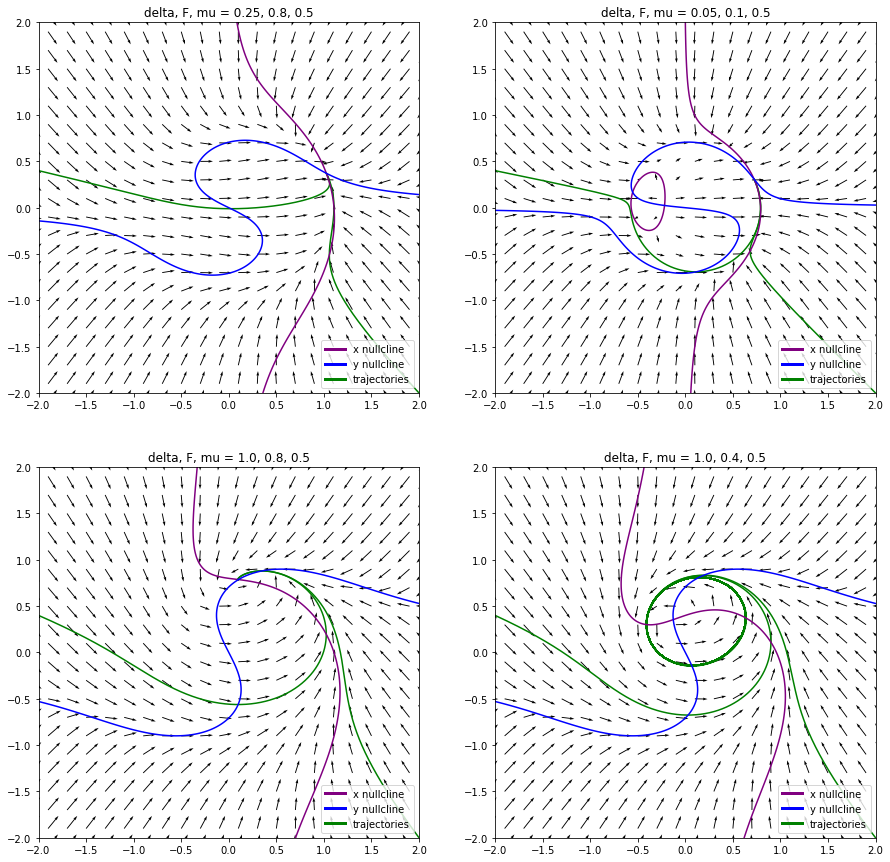

In [13]:
i=0
q=np.arange(-5.1,5.1,0.2) 
Np, Mp=np.meshgrid(q,q) 
f, l_ax = plt.subplots(2, 2, figsize=(15,15))
l_ax = l_ax.flatten()

for delta, F, mu in cond:
    
    # Nulclines
    Xnull=xnull(X,Y)
    Ynull=ynull(X,Y)
    
    # Vector field
    dN, dM=modelxy([Np,Mp],tspan) 
    dN = dN/np.sqrt(dN**2+dM**2)
    dM = dM/np.sqrt(dM**2+dN**2)
    l_ax[i].quiver(Np,Mp,dN,dM, scale = 30)
    
    # Trajectories
    for X0 in X0s:
        sol=odeint(modelxy, X0, tspan)
        l_ax[i].plot(*sol.T,'g')
    l_ax[i].set_title("delta, F, mu = " + str(delta) + ", " + str(F) + ", " + str(mu))
    l_ax[i].set_xlim(-2,2)
    l_ax[i].set_ylim(-2,2)
    l_ax[i].contour(X,Y,Xnull,V, colors='purple')
    l_ax[i].contour(X,Y,Ynull,V, colors='b')
    legend_elements=[Line2D([0], [0], color='purple', label='x nullcline',lw=3),
                     Line2D([0], [0], color='b', label='y nullcline',lw=3),
                     Line2D([0], [0], color='g', label='trajectories',lw=3)]
    l_ax[i].legend(handles=legend_elements,loc="lower right")
    i=i+1
plt.show()
plt.close()

In the plots purple is the x nullcline, blue is the y nullcline, green some trajectories

- Case 1: 1 PF: Stable fixed point
- Case 2: 3 fixed points (stable, unstable and saddle)
- Case 3: 1 PF: Stable spiral
- Case 4: 1 PF: Unstable spiral 

Please note that the definition of synchronization given ("Synchronization means that the system  𝑍˙=…  has a stable fixed point or a stable spiral.") is correct because by doing the change of variables
\begin{equation}
Z(t)=z(t)\exp(-i\Omega t)
\end{equation}
we look at the system in the reference frame of the external stimulus, so we will have synchronization when the system tends to $\dot{Z}=0$ (which corresponds to the case of a stable fixed point).

## Arnold Tongues

Now that you have understood the types of phase portrait that can occur in this model, summarize this in the $(\Delta, F)$ plane.

7) Find an expression of the Jacobien of the model above and express the trace and determinant in function of $R^2$. 
    
  

>The general expression of the jacobian for the system (in the xy coordinate system) is
\begin{equation}
J=\begin{pmatrix}
\mu -3x^2-y^2 & -\Delta -2xy \\
\Delta -2xy & \mu -x^2-3y^2
\end{pmatrix}
\end{equation}
We can calculate the trace:
\begin{equation}
    \text{Tr}(J)=2\mu -4x^2 -4y^2
\end{equation}
And the determinant:
\begin{equation}
    |J|=\mu^2-4\mu x^2-4\mu y^2+10x^2y^2+3x^4+3y^4+\Delta^2 -4x^2y^2
\end{equation}


> With $x^2 + y^2 = R^2$:


>\begin{equation}
    \text{Tr}(J)=2\mu -4x^2 -4y^2= 2\mu-4R^2
\end{equation}
And the determinant:
\begin{equation}
    |J|=\mu^2-4\mu x^2-4\mu y^2+10x^2y^2+3x^4+3y^4+\Delta^2 -4x^2y^2=\mu^2 + \Delta^2-4 \mu R^2 +3 R^4
\end{equation}

>We see that they only depend on $R^2$ .


8) The model can also be expressed in polar coordinates as follows :

\begin{equation}
    \dot R=\mu R-R^3 + F \cos (\phi)
\end{equation}
\begin{equation}
    \dot \phi= \Delta - \frac{F}{R} \sin (\phi) 
\end{equation}

In order to find the fixed points, combine these two equations (using that $cos^2(\phi) + sin^2(\phi) = 1$) to derive a cubic equation in $R^2$ for which the roots correspond to the fixed points.

*Hint: this equation only depneds on $R^2$ and not $\phi$.* 

>At the fixed points we have:
\begin{equation}
    0=\mu R-R^3 + F \cos (\phi)
\end{equation}
\begin{equation}
    0= \Delta - \frac{F}{R} \sin (\phi) 
\end{equation}
Thus
\begin{equation}
    F \cos (\phi)=-\mu R+R^3 
\end{equation}
\begin{equation}
    F \sin (\phi)= \Delta R 
\end{equation}
So we can square them and sum them:
\begin{equation}
    F^2 \cos^2 (\phi)+F^2 \sin^2 (\phi)=(-\mu R+R^3)^2+ \Delta^2  R^2 =\mu^2 R^2 + R^6 -2\mu R^4+\Delta^2  R^2=F^2
\end{equation}
This is a cubic equation in $R^2$, with at most 3 solutions for $R>0$.






9) Using the above formulae for the trace and determinant, indicate the stability of the fixed point(s) for the case where $\mu =0.5$ in regions of the $(\Delta, F)$ plane (vary $\Delta$ in $[0, 2]$ and $F$ in $[0, 1.3]$).
You can use the stability and coloring function below. In particular, indicate the region that correspond to synchronization. Interpret the result.



**Hint: To find the coordinates of the fixed points, use the np.roots function to find the roots of the cubic equation you found above**

In [6]:
def stability_dir(tau, D):
    if D < 0:
        type_fp = 'saddle fp'
    elif D == 0:
        type_fp = 'non-isolated fp'
    else:
        if tau**2-4*D < 0:
            type_fp_2 = 'spiral'
        elif tau**2-4*D == 0:
            type_fp_2 = 'star'
        else:
            type_fp_2 = 'fp'
            
        if tau < 0:
            type_fp = 'stable ' + type_fp_2
        elif tau == 0:
            type_fp = 'center '
        else:
            type_fp = 'unstable ' + type_fp_2
    return type_fp

def coloring(type_fp):
    if(type_fp=='saddle point'):
        return 'firebrick'
    elif(type_fp=='non-isolated fp'):
        return 'salmon'
    elif(type_fp=='center'):
        return 'crimson'
    elif(type_fp=='stable spiral'):
        return 'blue'
    elif(type_fp=='stable star'):
        return 'blueviolet'
    elif(type_fp=='stable fp'):
        return 'darkviolet'
    elif(type_fp=='unstable spiral'):
        return 'deepskyblue'
    elif(type_fp=='unstable star'):
        return 'skyblue'
    elif(type_fp=='unstable fp'):
        return 'aqua'

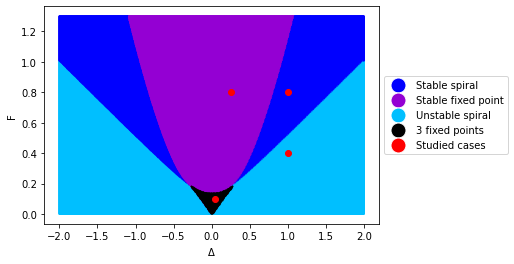

In [7]:
dim=500
dvar=np.linspace(-2,2,dim)
dvar=np.repeat(dvar,dim)
Fvar=np.linspace(0,1.3,dim)
Fvar=np.tile(Fvar,dim)
mvar=np.repeat(0.5,dim*dim)
conds=np.vstack([dvar,Fvar,mvar]).T
N_FPs = []
points_fixed=[]
colorandum=[]

for delta, F, mu in conds:
    roots=np.roots([1,-2*mu,(mu**2+delta**2),-F**2])
    N_FPs.append(np.isreal(roots).sum())
    for j in range(roots.shape[0]):
        if np.isreal(roots[j]):
            R2=np.real(roots[j])
            tau=2*mu-4*R2
            D = mu**2+delta**2-4*mu*R2+3*R2**2
            points_fixed.append([delta, F, mu, R2])
            tfp = stability_dir(tau,D)
            colorandum.append([tfp, coloring(tfp)])
            break
pf=np.array(points_fixed)
col=np.array(colorandum)
N_FPs = np.array(N_FPs)
plt.scatter(pf[:,0],pf[:,1],c=col[:,1],s=1)

# Three fixed point:
pf_o1 = pf[np.where(N_FPs ==3)]
plt.scatter(pf_o1[:,0],pf_o1[:,1],c='k',s=1)

plt.scatter(cond[:,0], cond[:,1], c= 'r')
plt.xlabel('$\Delta$')
plt.ylabel('F')
legend_elements=[Line2D([0], [0], marker='o', color='w', label='Stable spiral',markerfacecolor='blue', markersize=15),
                 Line2D([0], [0], marker='o', color='w', label='Stable fixed point',markerfacecolor='darkviolet', markersize=15),
                 Line2D([0], [0], marker='o', color='w', label='Unstable spiral',markerfacecolor='deepskyblue', markersize=15),
                 Line2D([0], [0], marker='o', color='w', label='3 fixed points',markerfacecolor='k', markersize=15), 
                Line2D([0], [0], marker='o', color='w', label='Studied cases',markerfacecolor='r', markersize=15)]
plt.legend(handles=legend_elements, loc='center left',bbox_to_anchor=(1, 0.5))
plt.show()
plt.close()

> We have synchronization in the case of a stable spiral or a stable fixed point. These cases correspond to an external stimulus $F$ that is large enough compared to the difference between the internal frequency and the frequency of the external force $\Delta$. When the external stimulus is too weak we don't reach synchronization and we have an unstable spiral.